In [ ]:
!pip install spotipy

     |████████████████████████████████| 138 kB 10.5 MB/s 
     |████████████████████████████████| 62 kB 616 kB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MyData/databt/data_o.csv")
genre_data = pd.read_csv('/content/drive/MyDrive/MyData/databt/data_by_genres_o.csv')
year_data = pd.read_csv('/content/drive/MyDrive/MyData/databt/data_by_year_o.csv')

In [ ]:
genre_data=genre_data.drop(401, axis=0)
data=data.drop([107341, 138618, 168377], axis=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170650 entries, 0 to 170652
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170650 non-null  float64
 1   year              170650 non-null  int64  
 2   acousticness      170650 non-null  float64
 3   artists           170650 non-null  object 
 4   danceability      170650 non-null  float64
 5   duration_ms       170650 non-null  int64  
 6   energy            170650 non-null  float64
 7   explicit          170650 non-null  int64  
 8   id                170650 non-null  object 
 9   instrumentalness  170650 non-null  float64
 10  key               170650 non-null  int64  
 11  liveness          170650 non-null  float64
 12  loudness          170650 non-null  float64
 13  mode              170650 non-null  int64  
 14  name              170650 non-null  object 
 15  popularity        170650 non-null  int64  
 16  release_date      17

In [ ]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2972 non-null   int64  
 1   genres            2972 non-null   object 
 2   acousticness      2972 non-null   float64
 3   danceability      2972 non-null   float64
 4   duration_ms       2972 non-null   float64
 5   energy            2972 non-null   float64
 6   instrumentalness  2972 non-null   float64
 7   liveness          2972 non-null   float64
 8   loudness          2972 non-null   float64
 9   speechiness       2972 non-null   float64
 10  tempo             2972 non-null   float64
 11  valence           2972 non-null   float64
 12  popularity        2972 non-null   float64
 13  key               2972 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 348.3+ KB


In [ ]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


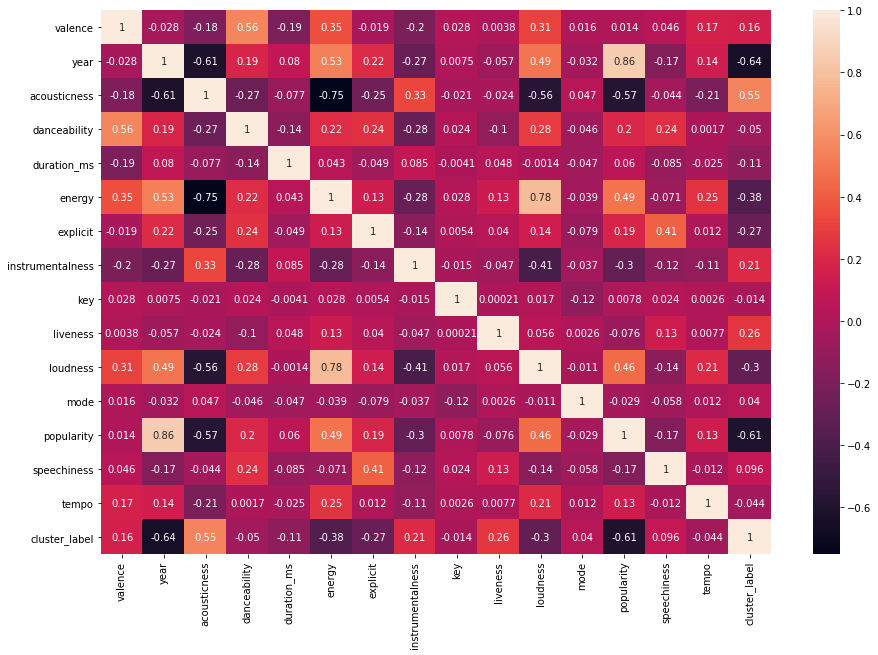

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
dataCorr=data.corr()
corrKey=dataCorr.keys()
plt.figure(figsize=(15, 10))
sns.heatmap(dataCorr, annot=True)
plt.savefig("dataCorr.png")

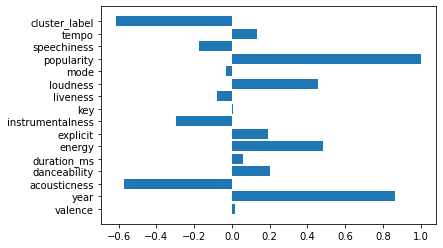

In [ ]:
plt.barh(corrKey,dataCorr['popularity'])
plt.savefig('corrPopularity.png')

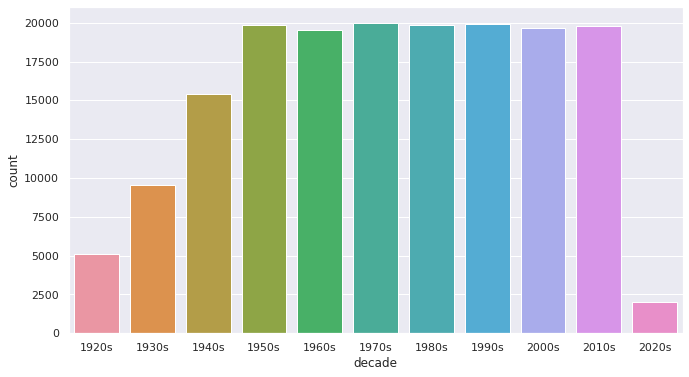

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

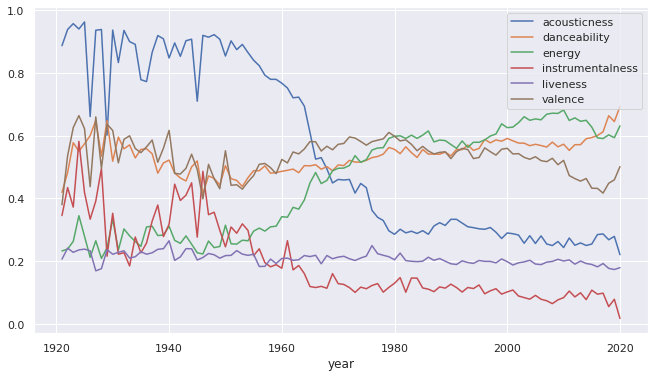

In [ ]:
yearKey = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence','year']
df=year_data[yearKey]
(df.set_index('year')).plot.line()
plt.savefig("musicYear.png")

<Figure size 1080x720 with 0 Axes>

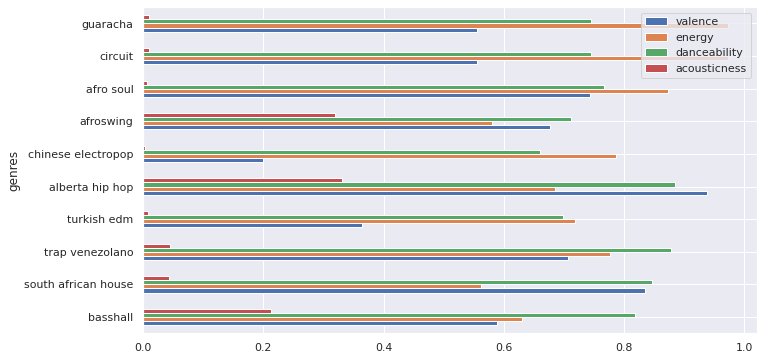

In [ ]:
top10_genres = genre_data.nlargest(10, 'popularity')
top10_genres=top10_genres[['valence', 'energy', 'danceability', 'acousticness','genres']]
top10_genres=top10_genres.set_index('genres')
plt.figure(figsize=(15, 10))
top10_genres.plot.barh()
plt.savefig("top10popu.png")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=6, n_jobs=-1))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

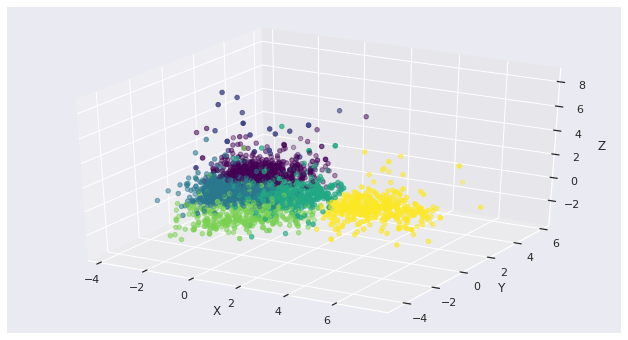

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
plot3d = Pipeline([('scaler', StandardScaler()), 
                        ('3d', PCA(n_components=3))])
X = genre_data.select_dtypes(np.number)
plot3d.fit(X)
X3d=plot3d.transform(X)
ax = plt.axes(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=genre_data['cluster'], cmap='viridis');
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig("cluster6GenreData.png")

In [ ]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=7, 
                                   verbose=2, n_jobs=4))],verbose=True)
X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............ (step 2 of 2) Processing kmeans, total=  16.4s


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
plot3d = Pipeline([('scaler', StandardScaler()), ('3d', PCA(n_components=3))])
X = data.select_dtypes(np.number)
plot3d.fit(X)
X3d=plot3d.transform(X)
ax = plt.axes(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=data['cluster_label'], cmap='viridis');
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig("cluster7data.png")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
SPOTIPY_CLIENT_ID='46ef19cf3f824296aee712b4d8aa9593'
SPOTIPY_CLIENT_SECRET='da2e3aae47aa42eb97707d3071ab470a'
client_credentials_manager=SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,
                                                           client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=client_credentials_manager)

def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [ ]:
recommend_songs([{'name': 'Come As You Are', 'year':1991},
                {'name': 'Smells Like Teen Spirit', 'year': 1991},
                {'name': 'Lithium', 'year': 1992},
                {'name': 'All Apologies', 'year': 1993},
                {'name': 'Stay Away', 'year': 1993}],  data)

[{'artists': "['Rascal Flatts']",
  'name': 'Life is a Highway - From "Cars"',
  'year': 2009},
 {'artists': "['Metallica']", 'name': 'Of Wolf And Man', 'year': 1991},
 {'artists': "['Keith Urban']", 'name': 'Somebody Like You', 'year': 2002},
 {'artists': "['Marillion']", 'name': 'Kayleigh', 'year': 1992},
 {'artists': "['Los Fugitivos']", 'name': 'Corazón Mágico', 'year': 1995},
 {'artists': "['Passion Pit']", 'name': 'Little Secrets', 'year': 2009},
 {'artists': "['Alice In Chains']", 'name': 'No Excuses', 'year': 1994},
 {'artists': "['Nickelback']",
  'name': 'If Today Was Your Last Day',
  'year': 2008},
 {'artists': "['Def Leppard']", 'name': "Let's Get Rocked", 'year': 1992},
 {'artists': "['Avril Lavigne']",
  'name': "Things I'll Never Say",
  'year': 2002}]

In [ ]:
import random
n=random.randint(1,100)
lsuser=data.sample(n=n, random_state=1)
lsuser=lsuser[lsuser['year']>2000]
X=[]
for i in lsuser[['name', 'year']].values:
  X.append({'name':i[0], 'year':i[1]})
  print({'name':i[0], 'year':i[1]})

{'name': "July In Cheyenne (Song For Lane's Momma)", 'year': 2012}
{'name': 'Sweet Annie', 'year': 2012}
{'name': 'Criticize', 'year': 2011}
{'name': 'Beautiful People (feat. Khalid)', 'year': 2019}
{'name': 'Beer With Jesus', 'year': 2013}
{'name': 'Llegamos A La Disco', 'year': 2020}
{'name': 'the few that remain', 'year': 2009}
{'name': 'You & Me', 'year': 2009}
{'name': 'Dios Bendiga Nuestro Amor', 'year': 2006}
{'name': 'My Girl', 'year': 2011}
{'name': '¿Qué Nos Pasó? (with Yuridia)', 'year': 2012}
{'name': 'This Is Halloween', 'year': 2006}
{'name': 'Year Zero', 'year': 2013}
{'name': 'Cristo Yo Te Amo', 'year': 2002}
{'name': 'Kiss the Dirt (Falling Down the Mountain)', 'year': 2001}
{'name': 'Trainwreck 1979 - Moulder Mix with in/out fades', 'year': 2014}
{'name': 'White Winter Hymnal', 'year': 2008}
{'name': 'Lava', 'year': 2019}
{'name': 'Traffic', 'year': 2012}
{'name': 'Upgrade', 'year': 2020}
{'name': 'Chunky', 'year': 2016}
{'name': 'All By My Lonely', 'year': 2011}
{'na

In [ ]:
recommend_songs(X,  data)

[{'artists': "['Tiana Major9', 'EARTHGANG']",
  'name': 'Collide - From "Queen & Slim: The Soundtrack"',
  'year': 2019},
 {'artists': "['Dan + Shay', 'Kelly Clarkson']",
  'name': 'Keeping Score (feat. Kelly Clarkson)',
  'year': 2018},
 {'artists': "['ILLENIUM', 'Jon Bellion']",
  'name': 'Good Things Fall Apart (with Jon Bellion)',
  'year': 2019},
 {'artists': "['Zedd', 'Griff']",
  'name': 'Inside Out (feat. Griff)',
  'year': 2020},
 {'artists': "['Gryffin', 'ILLENIUM', 'Daya']",
  'name': 'Feel Good (feat. Daya)',
  'year': 2017},
 {'artists': "['ILLENIUM', 'Jon Bellion']",
  'name': 'Good Things Fall Apart (with Jon Bellion)',
  'year': 2019},
 {'artists': "['Khalid', 'Normani']",
  'name': 'Love Lies (with Normani)',
  'year': 2018},
 {'artists': "['Quinn XCII']", 'name': 'U & Us', 'year': 2019},
 {'artists': "['alt-J']", 'name': 'Breezeblocks', 'year': 2012},
 {'artists': "['Shawn Mendes']", 'name': 'In My Blood', 'year': 2018}]